<a href="https://colab.research.google.com/github/kittimaxz/DWDM21/blob/main/Chapter6_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import pandas as pd
import os

In [142]:
from google.colab import drive ### เชื่อม google colab กับ google drive
drive.mount('/content/drive') ### mount คือคำสั่งใช้เชื่อมกัน
path = '/content/drive/My Drive/DWDM2021_DATA' # เป็นการชี้ที่อยู่ของไฟล์ที่อยู่ใน folder ใน drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


# [Q] มีประเทศสาขาของ supermarket นี้ทั้งหมดกี่ประเทศ

In [144]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [145]:
len(set(data['Country']))

38

# [HW13] วาดกราฟสรุปจำนวน items และ ยอดขายของแต่ละประเทศ

In [146]:
import matplotlib.pyplot as plt

In [147]:
import numpy as np

In [148]:
data_q = data.groupby('Country').sum().sort_values('Quantity')
data_cq = data_q.iloc[:,:2]
data_cq

,Quantity,UnitPrice
Country,,
Saudi Arabia,75,2.411000e+01
Bahrain,260,8.657000e+01
RSA,352,2.481000e+02
Brazil,356,1.426000e+02
Lebanon,386,2.424400e+02
European Community,497,2.940500e+02
Czech Republic,592,8.815000e+01
Lithuania,652,9.944000e+01
Malta,944,6.660100e+02


In [149]:
data_tp = data_cq['Quantity'] * data_cq['UnitPrice']
data_tp

Country
Saudi Arabia            1.808250e+03
Bahrain                 2.250820e+04
RSA                     8.733120e+04
Brazil                  5.076560e+04
Lebanon                 9.358184e+04
European Community      1.461428e+05
Czech Republic          5.218480e+04
Lithuania               6.483488e+04
Malta                   6.287134e+05
United Arab Emirates    2.257520e+05
USA                     6.669093e+05
Greece                  1.109879e+06
Iceland                 1.182814e+06
Canada                  2.515933e+06
Unspecified             3.973233e+06
Poland                  5.195552e+06
Israel                  4.697061e+06
Hong Kong               5.837971e+07
Austria                 8.213237e+06
Singapore               1.314199e+08
Cyprus                  2.476308e+07
Italy                   3.103124e+07
Denmark                 1.037379e+07
Channel Islands         3.543772e+07
Finland                 4.039054e+07
Portugal                2.109474e+08
Norway                  1.2566

In [150]:
data_q= data_cq.iloc[:,:1]
data_q

,Quantity
Country,
Saudi Arabia,75
Bahrain,260
RSA,352
Brazil,356
Lebanon,386
European Community,497
Czech Republic,592
Lithuania,652
Malta,944


In [151]:
data_p = pd.DataFrame(data_tp, columns = ['TotalPrice'])
data_p

,TotalPrice
Country,
Saudi Arabia,1.808250e+03
Bahrain,2.250820e+04
RSA,8.733120e+04
Brazil,5.076560e+04
Lebanon,9.358184e+04
European Community,1.461428e+05
Czech Republic,5.218480e+04
Lithuania,6.483488e+04
Malta,6.287134e+05


In [152]:
sales_table = data_q.merge(data_p,how='left',left_on='Quantity',right_on='TotalPrice')
sales_table

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Quantity,TotalPrice
0,75,NaN
1,260,NaN
2,352,NaN
3,356,NaN
4,386,NaN
5,497,NaN
6,592,NaN
7,652,NaN
8,944,NaN
9,982,NaN


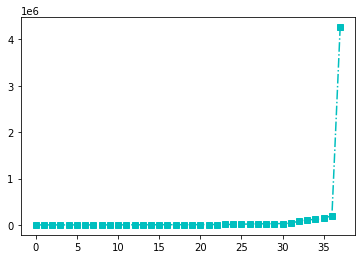

In [153]:
plt.plot(range(len(sales_table)),sales_table,'s-.c')